#Ethereum Blockchain Analysis


In [1]:
#Importing necessary modules

import numpy as np    #linear algebra
import pandas as pd   #data processing, CSV I/O
import datetime as dt   #converting timestamp to date
import seaborn as sns   #visualizer for data
import matplotlib.pyplot as plt   #matplot
import matplotlib.dates as mdates   #for plotting dates
%matplotlib inline
from subprocess import check_output 

###Creating dataframes with unique values in each of them

In [2]:
#creating dataframes

address_gr = pd.read_csv('/content/EthereumUniqueAddressGrowthRate.csv')
blocksize_hist = pd.read_csv('/content/EthereumBlockSizeHistory.csv')
etherprice_usd = pd.read_csv('/content/EtherPriceHistory(USD).csv')
hashrate_gr = pd.read_csv('/content/EthereumNetworkHashRate.csv')
marketcap = pd.read_csv('/content/EtherMarketCapChart.csv')
tx_hist = pd.read_csv('/content/EthereumTransactionHistory.csv')

# Create a list to input all the previously created dataframes along with their titles we wish to display on their graphs.
# Going to iterate and plot everything, except those with abnormalities 

things_to_plot = [(blocksize_hist, 'Blocksize History'),
                  (etherprice_usd, 'Etherprice - USD'),
                  (hashrate_gr, 'Hashrate Growth Rate'),
                  #(address_gr, 'Address Growth Rate'),
                  #(marketcap, 'Market Capital'),
                  (tx_hist, 'Transaction History')]

In [3]:
#Create a function to transform the datetime columns to acceptable formats

def timeConvert(df):
  timeValue = list(range(len(df)))
  for i in range(len(df)):
    timeValue[i] = (dt.datetime.fromtimestamp(df[i]).strftime('%Y-%m-%d'))
  return timeValue

## Price Plot (USD)

In [4]:
print(marketcap.columns)

Index(['Date(UTC)', 'UnixTimeStamp', 'Supply', 'MarketCap', 'Price'], dtype='object')


In [5]:
#Create a function to plot the data

def plot_data(data, title):
  
  #create a numpy array
  r = data.values
  
  #grab dates - convert format
  date_df = r[:,0]
  date_df = pd.to_datetime(date_df)

  #grab values
  value_df = r[:,2]

  #make new plots
  plt.style.use('ggplot')
  fig, ax = plt.subplots(figsize=(30,10))
  ax.set_title(title)
  ax.plot(date_df, value_df)
  ax.grid(False)

  #matplotlib date format object
  hfmt = mdates.DateFormatter('%Y -  - %m')

  #format the ticks
  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_major_formatter(hfmt)

  #format the co-ordinates message box
  def yvals(x):
    return '$%1.2f'%x

  ax.format_xdate = hfmt
  ax.format_ydata = yvals

  #Rotate 'x' labels.
  #Right align 'x' labels.
  #Move bottom of the axes up to make room.
  fig.autofmt_xdate()
  plt.show()



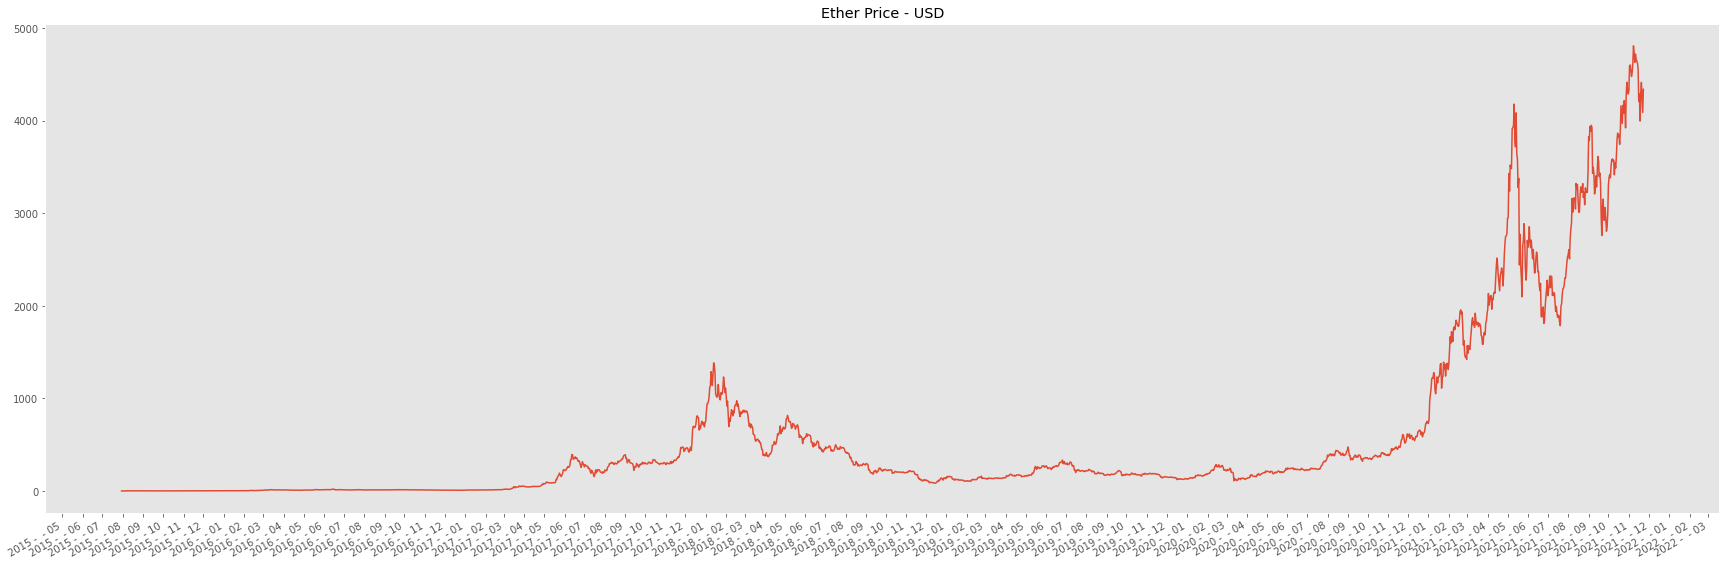

In [6]:
# Pass dataframe to the function defined earlier -> plot_date()

plot_data(etherprice_usd, 'Ether Price - USD')

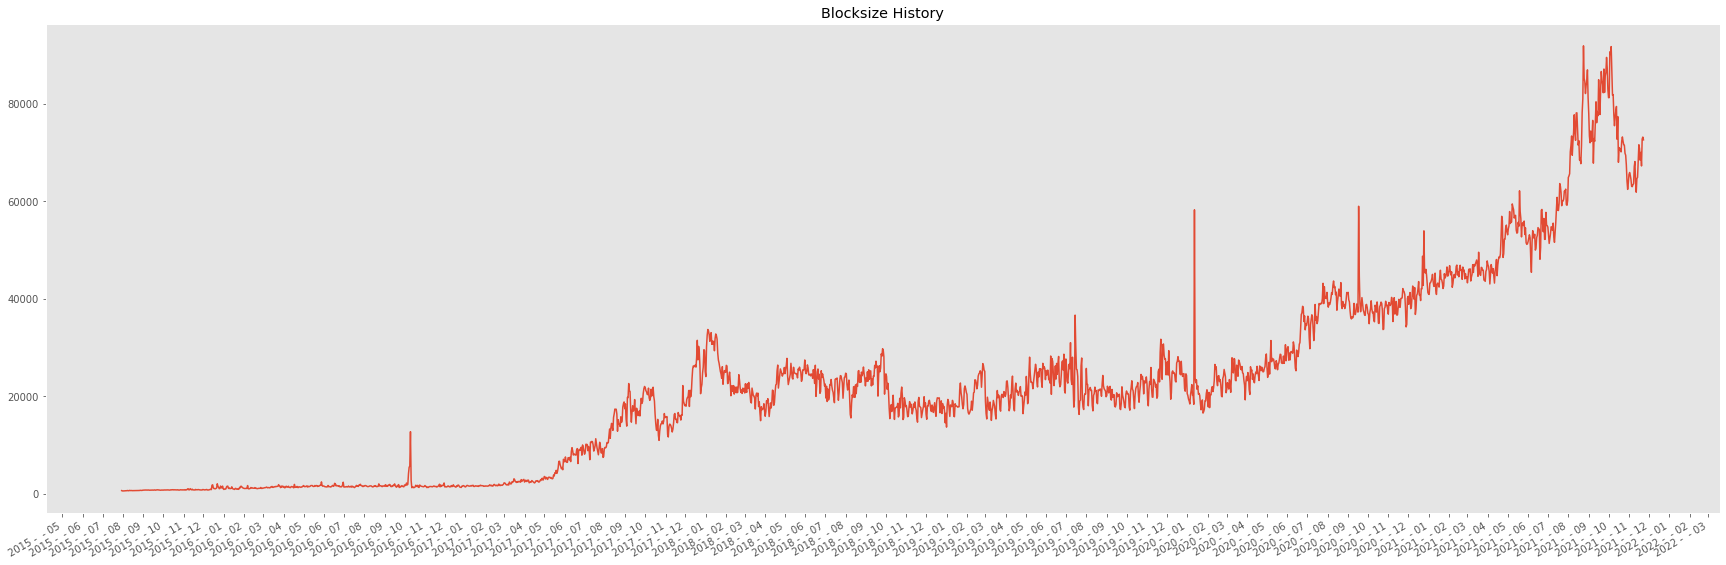

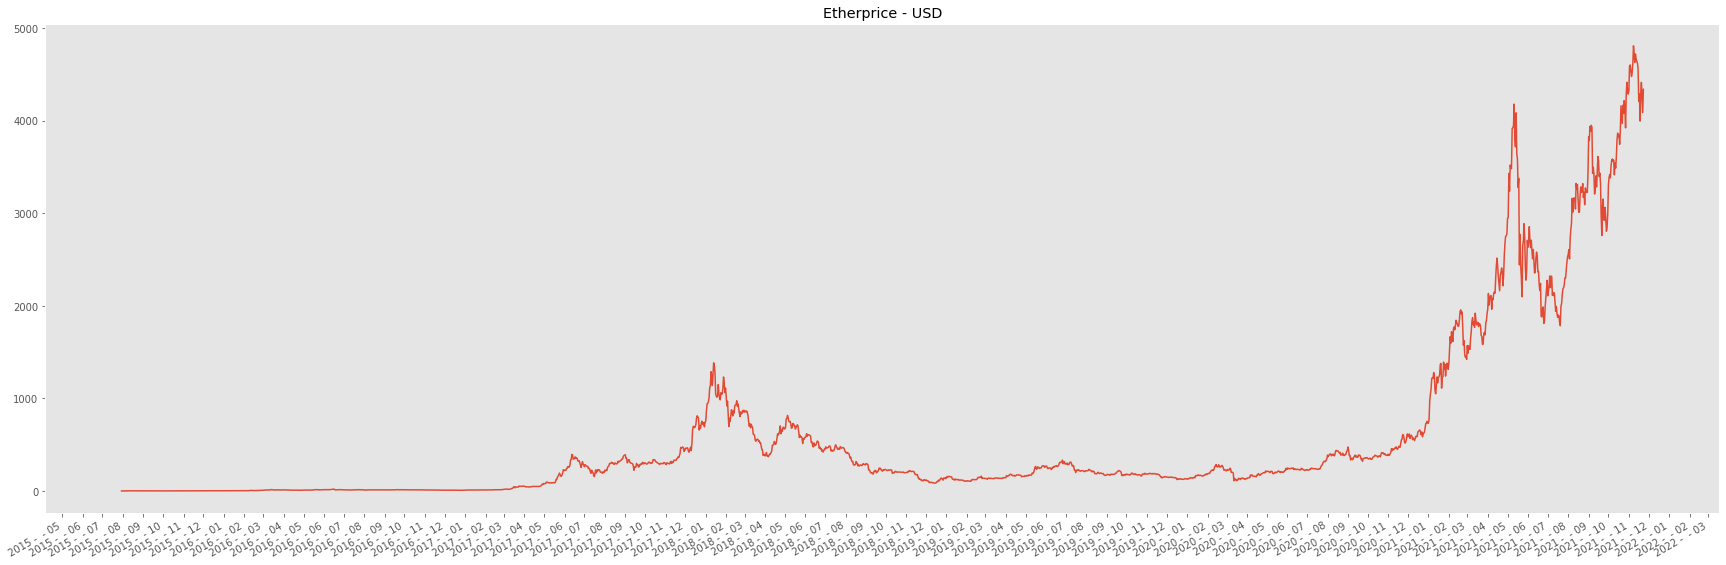

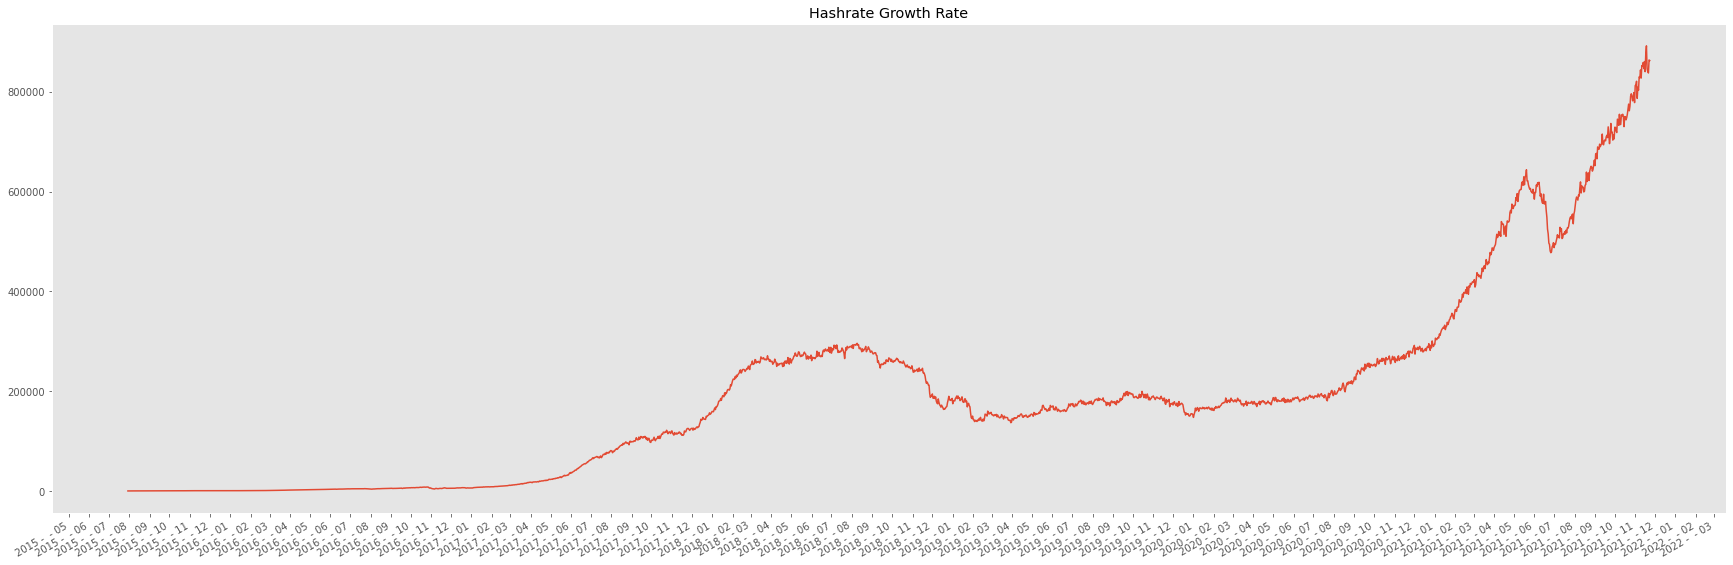

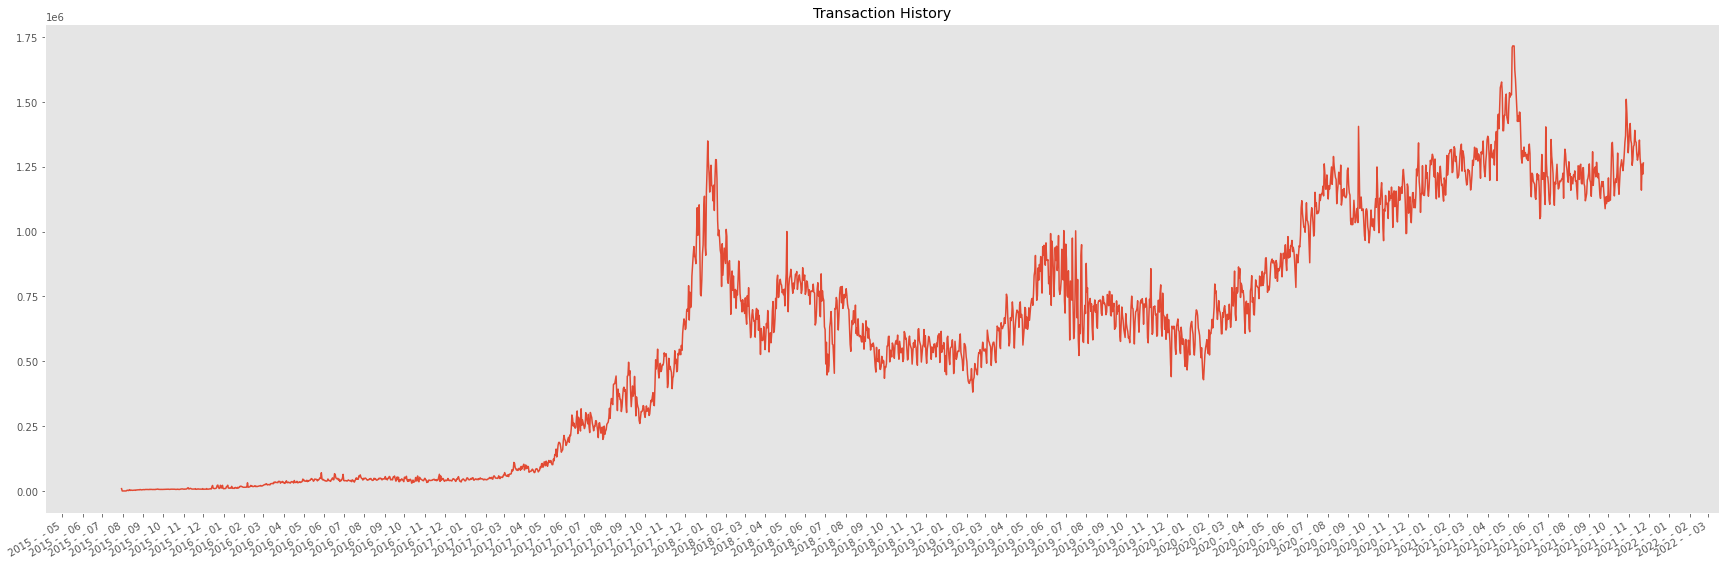

In [7]:
#Plotting for all dataframes together

for plot,title in things_to_plot:
  plot_data(plot, title)

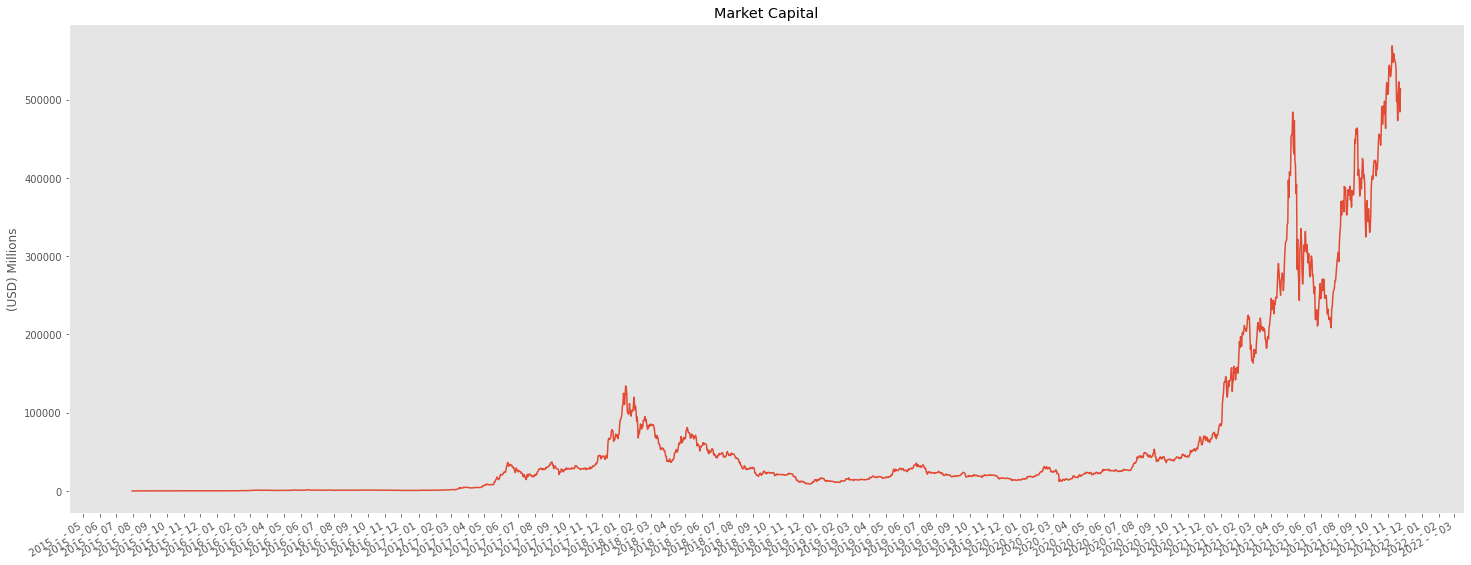

In [8]:
# Plot Market Capital

mkp = marketcap.values

date_df = mkp[:,0]
date_df = pd.to_datetime(date_df)
value_df = mkp[:,3]
prices_df = mkp[:,4]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(25,10))
ax.set_title('Market Capital')
ax.set_ylabel('(USD) Millions')
ax.plot(date_df, value_df)

ax.grid(False)

#format the dates
hfmt = mdates.DateFormatter('%Y -  - %m')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(hfmt)

def yvals(x):
  return '$%1.2f'%x

ax.format_xdata = hfmt
ax.format_ydata = yvals

fig.autofmt_xdate()
plt.show()

In [14]:
#Getting the sum of transactions when grouped by the dates

txs = tx_hist.copy()
txs['Date(UTC)'] = pd.to_datetime(txs['Date(UTC)']).dt.year
txs = txs.groupby('Date(UTC)')['Value'].apply(lambda x: (x.unique().sum()))
txs

Date(UTC)
2015      1048393
2016     13500530
2017    102941034
2018    251166529
2019    242832115
2020    344766970
2021    412272549
Name: Value, dtype: int64

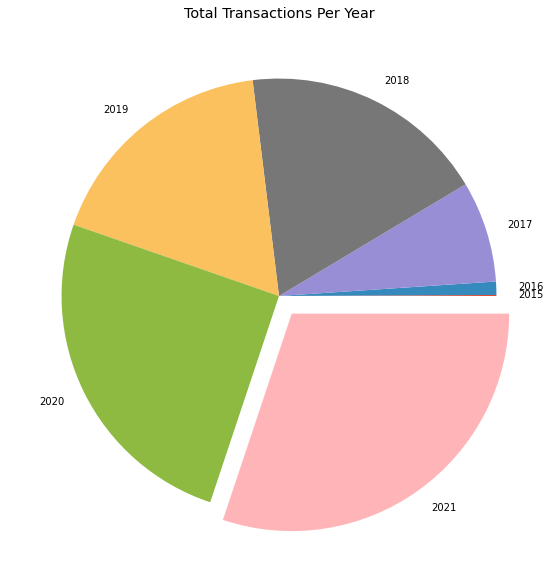

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
shap = txs
labels = '2015','2016','2017','2018','2019','2020','2021'
explode = (0, 0, 0, 0, 0, 0, 0.1)
ax.pie(shap, explode=explode, labels=labels, shadow = False)
plt.title('Total Transactions Per Year')
plt.show()